In [9]:
import numpy as np
import pandas as pd
# lightgbm
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# import data

In [17]:
data = pd.read_excel('./AML and ATF Modelling Assignment data_std_Updated.xlsx', sheet_name='data')

In [22]:
data_dictionary = pd.read_excel('./AML and ATF Modelling Assignment data_std_Updated.xlsx', sheet_name='data dictionary')

# Data EDA

In [24]:
data_dictionary

,Type,Data Element,Description
0,ID,cust_id_masked,Unique Customer ID
1,Target,rating,"Ratings (1 - high risk, 0 - moderate or low risk)"
2,Feature,cust_tenure,Number of years the customer has been with Sco...
3,Feature,cust_cdn_resident,Binary indicator whether the customer resides ...
4,Feature,prod_sav,Binary indicator for savings account
...,...,...,...
146,Feature,tot_cash_val_5m,Total amount of cash transaction (withdrawal a...
147,Feature,tot_cross_border_cnt_12m,Total count of cross-border wire transaction (...
148,Feature,tot_cash_cnt_5m,Total count of cash transaction (withdrawal an...
149,Feature,avg_cash_5m,Average of cash transaction (withdrawal and de...


In [25]:
data

,cust_tenure,cust_cdn_resident,prod_sav,prod_primary_sav_cnt,prod_cda,prod_primary_cda_cnt,prod_mor,prod_primary_mor_cnt,prod_llc,prod_primary_llc_cnt,...,acct_type_num,tot_acct_num.1,tot_cross_border_val_12m,tot_cash_val_5m,tot_cross_border_cnt_12m,tot_cash_cnt_5m,avg_cash_5m,avg_wire_12m,cust_id_masked,rating
0,-1.024753,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,1.840668,1.333540,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,004f8eab603ba30ea8fffd64ef39d5a990aff66b35f447...,0
1,-0.802710,-4.312772,1.208408,0.548246,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.175843,-0.484331,-0.128725,0.027173,-0.291457,-0.576554,1.707971,-0.140963,00a38e35a8350be0d0d2ef2c7c40de54f049ff8359b54e...,1
2,-0.893597,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,1.840668,1.333540,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,00d442a125b121bcd9e17ae58fdce2e7ae3513375afb2a...,0
3,-0.742306,0.231869,1.208408,0.548246,-1.187365,-0.989953,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,0114b5ce76aa3c09c460620cc19f1a77087ede3c326021...,0
4,0.574287,0.231869,-0.827535,-0.677491,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.874462,-0.784422,-0.128725,-0.081122,-0.291457,0.718380,-0.142708,-0.140963,015a0ba1cb86c4e46bb01f8ed501254cfb7422e240583f...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-0.724408,0.231869,1.208408,0.548246,-1.187365,-0.989953,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.874462,-0.784422,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963,fdf2f46a74ea777d5e0ef2b92319995df80c3c8a4b4432...,0
584,-0.748179,0.231869,1.208408,0.548246,0.842201,1.585677,-0.391077,-0.324689,-0.543281,-0.494249,...,-0.175843,-0.184240,-0.107816,-0.378492,0.192658,-0.835541,-0.400281,-0.071333,fe345e6c8e0a7099429c7b16f086aab11e589b878d106a...,1
585,-0.239215,0.231869,1.208408,0.548246,0.842201,2.873492,-0.391077,-0.324689,-0.543281,-0.494249,...,1.221395,1.616307,0.227885,0.503676,3.097351,1.624834,0.082314,0.028687,ff6a3f3a489bacdc79cccd457e671575b11391cac9655b...,1
586,0.942306,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,-0.543281,-0.494249,...,-1.573081,-1.084513,-0.128725,-0.366838,-0.291457,-0.447061,-0.359905,-0.140963,ff8fcb3b1b4bb844bff97217cef65259fe0523df71742e...,0


In [19]:
data['rating'].value_counts()

rating
0    390
1    198
Name: count, dtype: int64

In [20]:
data['cust_id_masked'].unique()# the number of unique customers = num of rows, we can safely drop this column as it is not useful

array(['004f8eab603ba30ea8fffd64ef39d5a990aff66b35f447150a2c09e54566b2ba',
       '00a38e35a8350be0d0d2ef2c7c40de54f049ff8359b54ed72452496f8bdeec93',
       '00d442a125b121bcd9e17ae58fdce2e7ae3513375afb2a08c1014d50d7074933',
       '0114b5ce76aa3c09c460620cc19f1a77087ede3c326021c4ad59d2fe49abb825',
       '015a0ba1cb86c4e46bb01f8ed501254cfb7422e240583f2e643a80ef97368ef5',
       '02f72cff71eeda1faaee79504b187db91491a12a62a5ab3a6288e6af27d124a7',
       '036f4bd2a05492d4c1f607b5cec9d831d9584ca69715e9cbe25a5a5c0090a8c3',
       '03d5fc5a8f1cf8b937916b12a5e9b5351200eaf8af8d44943e0a3d66e111438c',
       '03ec6ee67c63b7a5102dc8720742194894aaf5f8f327b92108e42fdb9f84e422',
       '04adacd9e573d85f5eec6b907d1a30b0d9e964a4faa037d188a68428a207b868',
       '0574ed27d7c7a504496fcabf1e20061bfafc1e8e2ecbc280d3cf4c78500c2241',
       '05a5fb44fc52346be364bb991df22dc9f1ae94a55ce6986c8f46a631b86b6f70',
       '063f640cd7552ee9b28b8346af39d7c2a755ebc764323a821784508f44ac2361',
       '06bb3c1535f6fb8f6

In [6]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['rating','cust_id_masked']), data['rating'], test_size=0.2, stratify=data['rating'], random_state=42)

In [7]:
X_train

,cust_tenure,cust_cdn_resident,prod_sav,prod_primary_sav_cnt,prod_cda,prod_primary_cda_cnt,prod_mor,prod_primary_mor_cnt,prod_llc,prod_primary_llc_cnt,...,prod_med,max_acct_num,acct_type_num,tot_acct_num.1,tot_cross_border_val_12m,tot_cash_val_5m,tot_cross_border_cnt_12m,tot_cash_cnt_5m,avg_cash_5m,avg_wire_12m
292,1.336893,0.231869,1.208408,0.548246,0.842201,0.297862,-0.391077,-0.324689,1.840668,3.161329,...,0.804400,2.694537,1.920015,2.216489,-0.128725,1.034440,-0.291457,2.401794,0.187162,-0.140963
547,-0.655894,0.231869,1.208408,0.548246,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,0.804400,-0.602150,1.221395,0.115852,-0.107728,-0.247187,1.645004,0.200406,-0.229683,-0.123483
554,-0.435530,-4.312772,-0.827535,-0.677491,0.842201,0.297862,2.557042,1.443063,-0.543281,-0.494249,...,0.804400,-0.602150,-0.175843,-0.484331,0.231009,-0.378492,1.160889,-0.835541,-0.400281,0.258353
538,0.181378,0.231869,1.208408,0.548246,-1.187365,-0.989953,-0.391077,-0.324689,-0.543281,-0.494249,...,-1.243163,-0.602150,-0.874462,-0.784422,-0.128725,-0.130114,-0.291457,0.329900,-0.113431,-0.140963
44,-0.301577,0.231869,-0.827535,-0.677491,0.842201,0.297862,-0.391077,-0.324689,1.840668,1.333540,...,0.804400,1.375862,1.221395,1.016125,-0.128725,-0.378492,-0.291457,-0.835541,-0.400281,-0.140963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.185043,0.231869,-0.827535,-0.677491,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,0.804400,0.057187,-0.175843,-0.184240,-0.128725,-0.365990,-0.291457,-0.058580,-0.378624,-0.140963
201,0.850301,0.231869,-0.827535,-0.677491,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,0.804400,-0.602150,-0.874462,-0.784422,-0.128725,-0.182187,-0.291457,0.070913,-0.108795,-0.140963
313,1.218321,0.231869,1.208408,1.773983,0.842201,0.297862,-0.391077,-0.324689,-0.543281,-0.494249,...,0.804400,0.057187,-0.175843,-0.184240,-0.128725,-0.083463,-0.291457,-0.706047,2.666267,-0.140963
576,2.128582,0.231869,-0.827535,-0.677491,-1.187365,-0.989953,-0.391077,-0.324689,1.840668,1.333540,...,-1.243163,0.716525,-0.175843,0.115852,-0.128725,-0.208850,-0.291457,-0.706047,1.362984,-0.140963


In [16]:
# run lightgbm feature importance on original data
# create dataset for lightgbm
lgb_train = lgb.Dataset(train.drop(['rating','cust_id_masked'], axis=1), train['rating'])
lgb_eval = lgb.Dataset(test.drop(['rating','cust_id_masked'], axis=1), test['rating'], reference=lgb_train)


In [19]:
# specify your configurations as a dict
params = {
    
}
# train lightgbm
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2325
[LightGBM] [Info] Number of data points in the train set: 470, number of used features: 92
[LightGBM] [Info] Start training from score 0.348936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

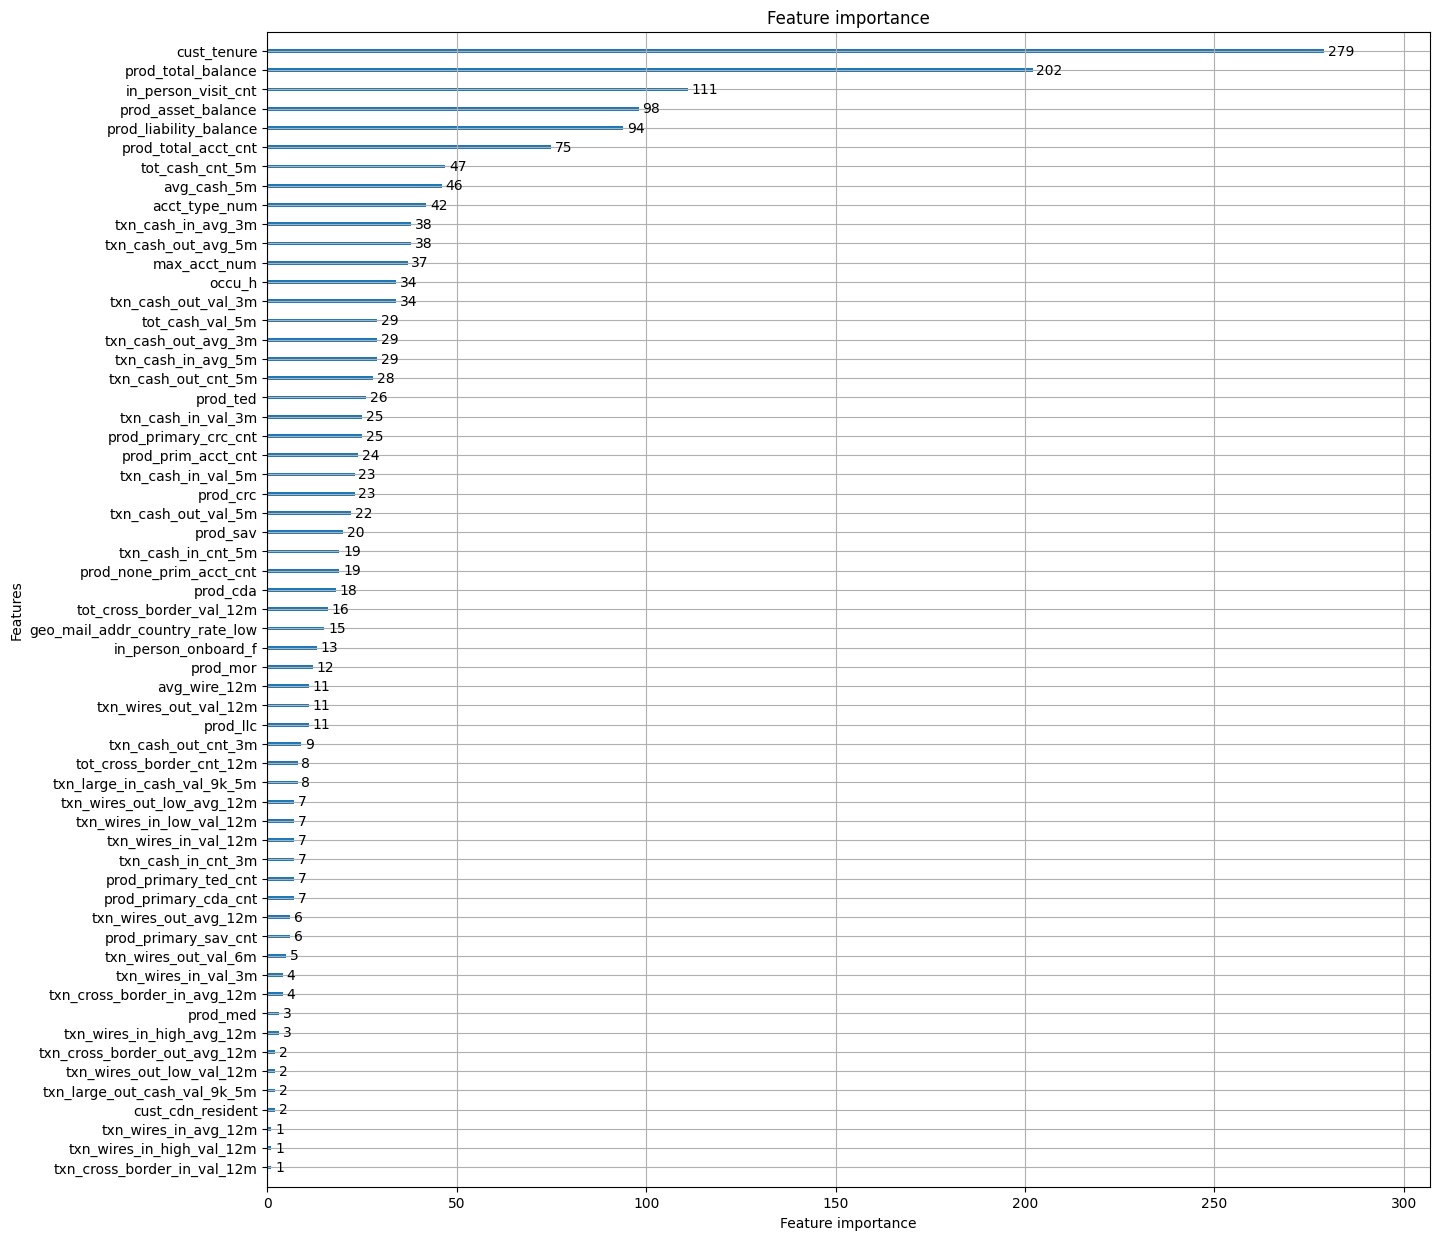

In [22]:
#plot feature importance
import matplotlib.pyplot as plt
lgb.plot_importance(gbm, figsize=(15, 15))
plt.show()

In [24]:
# see AUC in test set
from sklearn.metrics import roc_auc_score
y_pred = gbm.predict(test.drop(['rating','cust_id_masked'], axis=1), num_iteration=gbm.best_iteration)
print('The AUC of prediction is:', roc_auc_score(test['rating'], y_pred))

The AUC of prediction is: 0.8035714285714286


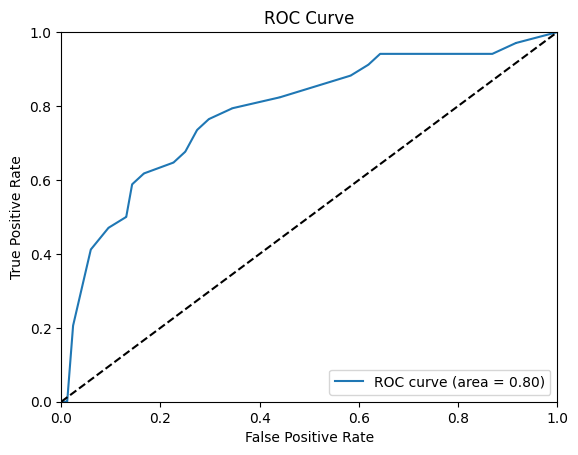

In [28]:
#plot auc plot with 45 degree line
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test['rating'], y_pred)
# apply exponential smoothing to tpr
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tpr = ExponentialSmoothing(tpr).fit().fittedvalues
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(test['rating'], y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()